In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [52]:
data = pd.read_csv('/content/Yelp Restaurant Reviews.csv')

In [53]:
data.head()

,Yelp URL,Rating,Date,Review Text
0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


In [54]:
data.shape

(19896, 4)

In [55]:
data = data.reset_index().rename(columns={'index': 'Unique Id'})

In [56]:
data.head()

,Unique Id,Yelp URL,Rating,Date,Review Text
0,0,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,1,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,2,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,3,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,4,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


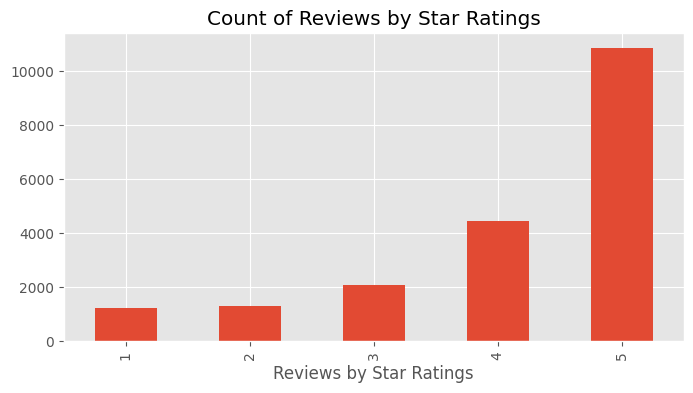

In [57]:
# Exploratory Data Analysis

ax = data['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Star Ratings',
                                            figsize=(8,4))
ax.set_xlabel('Reviews by Star Ratings')
plt.show()

In [58]:
example = data['Review Text'][37]
print(example)

This ice cream was exceptionally good. I would so come back here next time I'm in PHX. Think of getting soft serve ice cream mixed in with you favorite cereal... this is the place to go!


In [59]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'ice',
 'cream',
 'was',
 'exceptionally',
 'good',
 '.',
 'I',
 'would',
 'so']

In [62]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [63]:
tageed = nltk.pos_tag(tokens)
tageed[:10]

[('This', 'DT'),
 ('ice', 'NN'),
 ('cream', 'NN'),
 ('was', 'VBD'),
 ('exceptionally', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('I', 'PRP'),
 ('would', 'MD'),
 ('so', 'RB')]

In [67]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [68]:
entities = nltk.chunk.ne_chunk(tageed)
entities.pprint()

(S
  This/DT
  ice/NN
  cream/NN
  was/VBD
  exceptionally/RB
  good/JJ
  ./.
  I/PRP
  would/MD
  so/RB
  come/VB
  back/RB
  here/RB
  next/JJ
  time/NN
  I/PRP
  'm/VBP
  in/IN
  (ORGANIZATION PHX/NNP)
  ./.
  Think/NNP
  of/IN
  getting/VBG
  soft/JJ
  serve/NN
  ice/NN
  cream/NN
  mixed/VBD
  in/IN
  with/IN
  you/PRP
  favorite/VBP
  cereal/NN
  .../:
  this/DT
  is/VBZ
  the/DT
  place/NN
  to/TO
  go/VB
  !/.)


In [70]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [71]:
# VADER Sentiment Scoring
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [73]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.7569}

In [75]:
result = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Review Text']
    my_id = row['Unique Id']
    result[my_id] = sia.polarity_scores(text)

  0%|          | 0/19896 [00:00<?, ?it/s]

In [77]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Unique Id'})
vaders = vaders.merge(data, how='left')

In [78]:
# Sentiment Score and Metadata

vaders.head()

,Unique Id,neg,neu,pos,compound,Yelp URL,Rating,Date,Review Text
0,0,0.000,0.641,0.359,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,1/22/2022,All I can say is they have very good ice cream...
1,1,0.022,0.660,0.318,0.9509,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,6/26/2022,Nice little local place for ice cream.My favor...
2,2,0.000,0.651,0.349,0.8803,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,8/7/2021,A delicious treat on a hot day! Staff was very...
3,3,0.020,0.752,0.227,0.9400,https://www.yelp.com/biz/sidney-dairy-barn-sidney,4,7/28/2016,This was great service and a fun crew! I got t...
4,4,0.027,0.730,0.243,0.9924,https://www.yelp.com/biz/sidney-dairy-barn-sidney,5,6/23/2015,This is one of my favorite places to get ice c...


Text(0.5, 1.0, 'Compound Score by Star Rating Review')

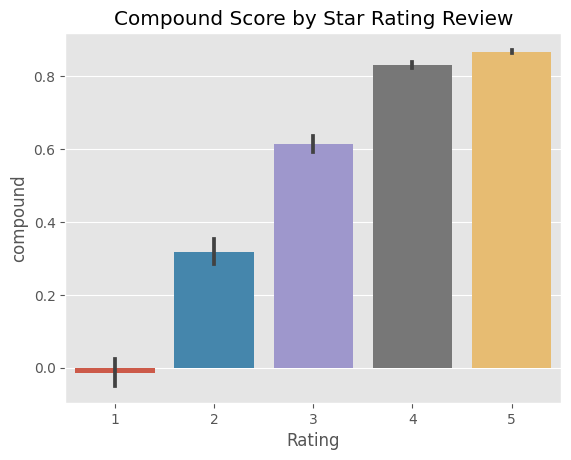

In [79]:
# Plot VADER results

ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compound Score by Star Rating Review')

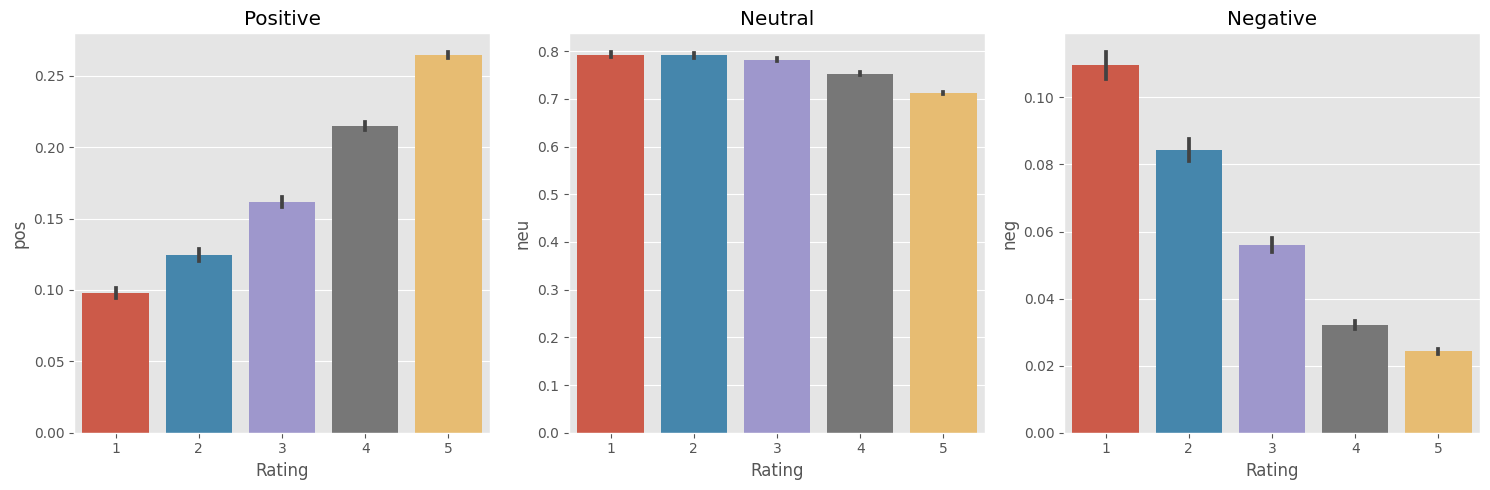

In [80]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

In [82]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 143.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 92.3 MB/s eta 0:00:00


In [83]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [84]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [85]:
print(example)
sia.polarity_scores(example)

This ice cream was exceptionally good. I would so come back here next time I'm in PHX. Think of getting soft serve ice cream mixed in with you favorite cereal... this is the place to go!


{'neg': 0.0, 'neu': 0.836, 'pos': 0.164, 'compound': 0.7569}

In [86]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dct = {
    'robert_neg': scores[0],
    'robert_neu': scores[1],
    'robert_pos': scores[2]

}
print(scores_dct)

{'robert_neg': 0.0013317659, 'robert_neu': 0.007379325, 'robert_pos': 0.9912889}


In [87]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [90]:
print(scores)

[0.00133177 0.00737933 0.9912889 ]


In [96]:
if scores[2] > 0.5:
   print("Positive Review by customer")
if scores[1] > 0.5 :
    print("Neutral Review by customer")
if scores[0] > 0.5 :
    print("Negative Review by customer")

Positive Review by customer
